In [118]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as db

Справочники

In [119]:
members_df = pd.read_csv('data/Справочник участников оборота товаров.csv')

points_df = pd.read_csv('data/Справочник торговых точек.csv')

points_df.loc[points_df['region_code'] == 51, 'city_with_type'] = "Мурманская"
points_df.loc[points_df['region_code'] == 77, 'city_with_type'] = "Москва"
points_df.loc[points_df['region_code'] == 50, 'city_with_type'] = "Мо"
points_df.loc[points_df['region_code'] == 78, 'city_with_type'] = "Спб"
points_df['postal_code'] = points_df['postal_code'].fillna(0).astype(int)

products_df = pd.read_csv('data/Справочник продукции.csv')

products_df['country'] = products_df['country'].fillna('0')
products_df['volume'] = products_df['volume'].fillna(1)
products_df.loc[products_df['volume'] == "НЕ КЛАССИФИЦИРОВАНО", 'volume'] = 1

Join points and members

In [120]:
inn_points_region_code_equal = points_df.set_index('inn').join(members_df.set_index('inn')['region_code'], rsuffix='_inn').query("region_code == region_code_inn").index.unique()

In [121]:
inn_points_region_code_NOT_equal = set(members_df['inn'].unique()) - set(inn_points_region_code_equal)
inn_points_region_code_NOT_equal = np.array(list(inn_points_region_code_NOT_equal))
inn_points_region_code_NOT_equal.size

11274

Агрегированные

In [122]:
movement_df = pd.read_csv('data/Агрегированные данные о перемещениях товаров между участниками с 2021-11-22 по 2022-11-21.csv')
out_df = pd.read_csv('data/Агрегированные данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21.csv')
in_df = pd.read_csv('data/Агрегированные данные о вводе товаров в оборот с 2021-11-22 по 2022-11-21.csv')

Производитель

In [123]:
factory_in = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о вводе товаров в оборот с 2021-11-22 по 2022-11-21 один производитель.csv')
factory_out = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о выводе товаров из оборота с 2021-11-22 по 2022-11-21 один производитель.csv')
factory_move = pd.read_csv('data/Дополнительные датасеты для продукта для производителя/Данные о перемещениях товаров между участниками с 2021-11-22 по 2022-11-21 один производитель.csv')

In [124]:
factory_move.head(5)

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
0,2022-03-28,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,1141B8EB196FC9FE45B4FF3ED85F77DF,3300B49A222B322B9EA60CE45672178C,5
1,2022-03-28,42E4014F6E3023404F8B676D080EDDB0,DA62EC79660CF21AC37A260DA6F642C4,B6D3FC3661E47A30E2579CF85C81F179,DFE5BB9A38F0887450C94A05B5258D16,1
2,2022-03-28,8AD9201DF484BA62BFCDA93389BE2546,DA62EC79660CF21AC37A260DA6F642C4,5137D2202694EB65874BB604ACA4C56B,6E13702FD0C465A91622BA2492AEBC03,1
3,2022-03-28,777D245A6557001F2461B3F35E68A759,DA62EC79660CF21AC37A260DA6F642C4,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,1
4,2022-03-28,D5849F5C3693948DA91F02E989A0AC9A,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,C8719385CAB828EFE6FACB3D5304BF66,1


In [125]:
factory_out.head(5)

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,F5DEEE4DB58DAE786ABB7ACC1339E7AC,Продажа конечному потребителю в точке продаж,1285,2
1,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,0CDC2604FE5051E46DA2A9ED5B318274,Продажа конечному потребителю в точке продаж,1285,2
2,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,5196C057F2C464323436C87B54DE6119,Продажа конечному потребителю в точке продаж,1128,1
3,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,29F8E31472B06FD89405AB4CF147D352,Продажа конечному потребителю в точке продаж,1285,2
4,2022-10-15,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,89F1BFD156A04E3D9B28C7FD6BED4F2F,E778C673254F2DE374B3EAB367FF3478,Продажа конечному потребителю в точке продаж,1285,1


Фильтрация 

Оставляем только продажи конечному

In [126]:
factory_out = factory_out.query('type_operation == "Продажа конечному потребителю в точке продаж"')

Объединенные

In [318]:
factory_out_joined = factory_out.set_index('id_sp_').join(points_df.set_index('id_sp_')[['region_code','city_with_type', 'postal_code']]) \
.set_index('gtin').join(products_df.set_index('gtin')[['product_name', 'product_short_name', 'brand', 'country']]).drop_duplicates().reset_index()

In [319]:
factory_out.shape, factory_out_joined.shape

((1559507, 8), (1538588, 14))

In [311]:
factory_move_joined = factory_move.set_index('gtin').join(products_df.set_index('gtin')[['product_name', 'product_short_name', 'brand', 'country']]).drop_duplicates() \
.reset_index().rename(columns={factory_move.index.name:'gtin'}).set_index('sender_inn').join(members_df.set_index('inn')).reset_index().rename(columns={'index':'sender_inn'}).drop_duplicates()\
.set_index('receiver_inn').join(members_df.set_index('inn'), rsuffix='_rec_inn').reset_index().rename(columns={'index':'receiver_inn'}).drop_duplicates()

In [312]:
factory_move.shape, factory_move_joined.shape

((342302, 6), (342302, 12))

In [344]:
# factory_out_joined.to_csv('factory_out_joined.csv')
# factory_move_joined.to_csv('factory_move_joined.csv')

In [315]:
factory_move_joined.columns

Index(['receiver_inn', 'sender_inn', 'gtin', 'dt', 'prid', 'cnt_moved',
       'product_name', 'product_short_name', 'brand', 'country', 'region_code',
       'region_code_rec_inn'],
      dtype='object')

date time

In [372]:
factory_out_joined['date'] = pd.to_datetime(factory_out_joined['dt'])
factory_move_joined['date'] = pd.to_datetime(factory_move_joined['dt'])

factory_out_joined['month'] = factory_out_joined['date'].dt.month
factory_move_joined['month'] = factory_move_joined['date'].dt.month

factory_out_joined['week'] = factory_out_joined['date'].dt.week
factory_move_joined['week'] = factory_move_joined['date'].dt.week

factory_out_joined['day'] = factory_out_joined['date'].dt.day
factory_move_joined['day'] = factory_move_joined['date'].dt.day

factory_out_joined['dayy'] = factory_out_joined['date'].dt.dayofyear
factory_move_joined['dayy'] = factory_move_joined['date'].dt.dayofyear

C:\Users\Dima\AppData\Local\Temp\ipykernel_2248\1484775481.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  factory_out_joined['week'] = factory_out_joined['date'].dt.week
C:\Users\Dima\AppData\Local\Temp\ipykernel_2248\1484775481.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  factory_move_joined['week'] = factory_move_joined['date'].dt.week


Фиильтрация

In [244]:
factory_out_joined = factory_out_joined.query("postal_code > 0")

Copy to SQL Lite

In [245]:
con = db.connect('./db_project\identifier.sqlite')
factory_out_joined.to_sql('factory_out_joined', con, if_exists='replace')
factory_move_joined.to_sql('factory_move_joined', con, if_exists='replace')

342302

In [36]:
# factory_out_joined.to_csv('factory_out_joined.csv')
# factory_move_joined.to_csv('factory_move_joined.csv')

In [178]:
factory_move_joined.head(5)

,receiver_inn,sender_inn,dt,prid,cnt_moved,product_name,product_short_name,brand,country,region_code,region_code_rec_inn,date,month,week
0,001302A80A24238AFF2C225ED859BE24,4D335F39E9F496F935C0397D78D57285,2022-07-04,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,22,54.0,2022-07-04,7,27
1,001302A80A24238AFF2C225ED859BE24,8C6B3D74EF25A874F391B8764C0882AA,2022-10-18,DA62EC79660CF21AC37A260DA6F642C4,6,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,54,54.0,2022-10-18,10,42
2,001302A80A24238AFF2C225ED859BE24,8C6B3D74EF25A874F391B8764C0882AA,2022-11-01,DA62EC79660CF21AC37A260DA6F642C4,10,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,54,54.0,2022-11-01,11,44
3,001302A80A24238AFF2C225ED859BE24,8C6B3D74EF25A874F391B8764C0882AA,2022-07-26,DA62EC79660CF21AC37A260DA6F642C4,4,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,54,54.0,2022-07-26,7,30
4,001302A80A24238AFF2C225ED859BE24,8C6B3D74EF25A874F391B8764C0882AA,2022-07-12,DA62EC79660CF21AC37A260DA6F642C4,5,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,54,54.0,2022-07-12,7,28


In [179]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month,week
gtin,,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-02-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,6571,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-02-28,2,9
01008088C6247B9C0A1F4F460898065E,2022-11-07,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,9285,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-11-07,11,45
01008088C6247B9C0A1F4F460898065E,2022-09-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,9714,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2022-09-28,9,39
01008088C6247B9C0A1F4F460898065E,2021-12-15,DA62EC79660CF21AC37A260DA6F642C4,8752AAB98B1F3C10F6A4696B6BBE58C2,Продажа конечному потребителю в точке продаж,5642,1,52.0,г Дзержинск,606023.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,2021-12-15,12,50


In [39]:
factory_out_joined.sort_values(by='cnt', ascending=False).head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,volume,date,month,week
gtin,,,,,,,,,,,,,,,,,
B482F2136F3C04724E6D5EC4050B38DD,2022-10-06,DA62EC79660CF21AC37A260DA6F642C4,4060B78560B9DBBD7C59B77C0CB16183,Продажа конечному потребителю в точке продаж,1171,354,38.0,г Иркутск,664053.0,A4A0F5F9CEC6E5230852CAD5F2273A16,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,85,2022-10-06,10,40
82679ED6AB16F320FC9566B50CBBA5E7,2022-10-06,DA62EC79660CF21AC37A260DA6F642C4,4060B78560B9DBBD7C59B77C0CB16183,Продажа конечному потребителю в точке продаж,1171,353,38.0,г Иркутск,664053.0,95E95A4E764D3241EF023BD21B595F00,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,85,2022-10-06,10,40
06F4CAE6A2764D141E53C3AC8282CD36,2022-05-23,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,Продажа конечному потребителю в точке продаж,1357,179,38.0,г Иркутск,664039.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,100,2022-05-23,5,21
06F4CAE6A2764D141E53C3AC8282CD36,2022-05-23,DA62EC79660CF21AC37A260DA6F642C4,623065E7FDF2FA62F2197A7C9F8F5333,Продажа конечному потребителю в точке продаж,1357,179,38.0,г Иркутск,664039.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-05-23,5,21
06F4CAE6A2764D141E53C3AC8282CD36,2022-10-05,DA62EC79660CF21AC37A260DA6F642C4,B4C6833A7A02063FFF455500A9ECA088,Продажа конечному потребителю в точке продаж,988,167,48.0,г Липецк,398007.0,3450999CEDBFE595CD0DDE4A287CF500,C6AD4B84092CCBB3E3729F73B00C55A1,550710FDA7CDAABA81268E683325B534,РОССИЯ,100,2022-10-05,10,40


In [40]:
factory_out.groupby(['dt']).count().sort_values(by='gtin',ascending=False)

,gtin,prid,inn,id_sp_,type_operation,price,cnt
dt,,,,,,,
2021-12-30,8130,8130,8130,7047,8130,8130,8130
2022-02-22,7989,7989,7989,6797,7989,7989,7989
2022-03-15,7845,7845,7845,6776,7845,7845,7845
2021-12-29,7576,7576,7576,6594,7576,7576,7576
2021-12-15,7483,7483,7483,6642,7483,7483,7483
...,...,...,...,...,...,...,...
2022-01-07,2890,2890,2890,2561,2890,2890,2890
2022-01-02,2729,2729,2729,2461,2729,2729,2729
2022-04-24,2472,2472,2472,2122,2472,2472,2472


In [41]:
# factory_out['date'] = pd.to_datetime(factory_out['dt']) 

In [42]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,volume,date,month,week
gtin,,,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,16,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-02-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,6571,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-02-28,2,9
01008088C6247B9C0A1F4F460898065E,2022-02-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,6571,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,16,2022-02-28,2,9
01008088C6247B9C0A1F4F460898065E,2022-11-07,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,9285,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-11-07,11,45


In [43]:
zips = factory_out_joined['postal_code'].values

In [44]:
factory_out_joined['product_short_name'].values

array(['2868B842B46F754C088D89E130F89585',
       '2868B842B46F754C088D89E130F89585',
       '2868B842B46F754C088D89E130F89585', ...,
       'C6AD4B84092CCBB3E3729F73B00C55A1',
       'C6AD4B84092CCBB3E3729F73B00C55A1',
       'C6AD4B84092CCBB3E3729F73B00C55A1'], dtype=object)

In [251]:
factory_out_joined_part_one = factory_out_joined[factory_out_joined['product_short_name'] == 'C6AD4B84092CCBB3E3729F73B00C55A1']

Продажи по конкретному кода

In [252]:
factory_out_joined_part_one[factory_out_joined_part_one['postal_code'] == 665654.0].groupby(['dt']).count()['prid']

dt
2021-12-30    1
2022-01-10    1
2022-05-11    1
2022-06-13    1
2022-06-23    1
2022-08-16    1
2022-08-24    2
Name: prid, dtype: int64

По региону

In [253]:
factory_out_joined_part_one[factory_out_joined_part_one['region_code'] == 47].groupby(['month']).count()['prid']

month
1     1084
2     1189
3     1369
4     1131
5     1088
6     1244
7     1160
8     1115
9      970
10    1280
11    1377
12    1469
Name: prid, dtype: int64

In [254]:
factory_out_joined_part_one.groupby(['postal_code']).count().sort_values(by='dt', ascending=False)['dt']

postal_code
109012.0    10581
119002.0     7459
141031.0     5648
115162.0     5482
109341.0     3803
            ...  
612450.0        1
684415.0        1
612510.0        1
612548.0        1
461048.0        1
Name: dt, Length: 6573, dtype: int64

In [49]:
factory_out_joined.head(5)

,dt,prid,inn,type_operation,price,cnt,region_code,city_with_type,postal_code,product_name,product_short_name,brand,country,volume,date,month,week
gtin,,,,,,,,,,,,,,,,,
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-09-10,DA62EC79660CF21AC37A260DA6F642C4,9C28F2B2179B7B37FB2C93182BADD04F,Продажа конечному потребителю в точке продаж,13000,1,38.0,г Железногорск-Илимский,665654.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,16,2022-09-10,9,36
01008088C6247B9C0A1F4F460898065E,2022-02-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,6571,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-02-28,2,9
01008088C6247B9C0A1F4F460898065E,2022-02-28,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,6571,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,16,2022-02-28,2,9
01008088C6247B9C0A1F4F460898065E,2022-11-07,DA62EC79660CF21AC37A260DA6F642C4,B274C4CA9ADFED5C0033B5C5D1155EDA,Продажа конечному потребителю в точке продаж,9285,1,25.0,г Большой Камень,692802.0,7BF4B9BDF41DF8B6848B3CB683A3728B,2868B842B46F754C088D89E130F89585,550710FDA7CDAABA81268E683325B534,РОССИЯ,1,2022-11-07,11,45


In [50]:
factory_out_joined.query('region_code == 21')['month'].value_counts()

12    1737
10    1457
2     1374
3     1360
11    1351
1     1144
8     1136
7     1045
9      941
4      907
5      883
6      805
Name: month, dtype: int64

In [51]:
factory_out_joined['month'].value_counts()

12    265370
10    241364
3     240017
11    225409
7     216832
8     209812
6     205437
9     200664
2     194996
5     191383
4     185294
1     172765
Name: month, dtype: int64

In [52]:
factory_out_joined['week'].value_counts()

50    61160
41    61062
52    60905
51    60421
11    60102
46    58106
8     57775
9     57162
47    56545
10    56231
28    55343
40    54030
7     53985
45    53403
42    52638
43    52555
44    52154
49    52036
24    52000
33    51732
39    49948
37    49015
29    48719
38    48683
32    48569
12    48178
23    48078
48    47616
25    47498
30    47072
15    46906
34    46534
27    46192
31    44729
21    44618
19    44571
26    44569
22    44558
20    44191
6     43897
17    43458
35    43223
36    42605
13    42559
14    41912
2     41782
18    41429
1     41357
3     40200
4     39590
16    39485
5     38257
Name: week, dtype: int64

Перемещение по short name region

In [54]:
factory_move_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code_rec_inn == 77").groupby(['receiver_inn']).count()['sender_inn'].sort_values(ascending=False)

receiver_inn
2BE02F3FE88C85D34B7B4A577DAA638D    9504
5C87E9B71FEC0A6A9C761D46F0B3EB9C    1168
E8A6B8662FA8612FD280AF241578B7DB     488
100126885D43649E573635E39F4AA256     288
F3907BFDD402FD883DCCEE92AF490A74     242
                                    ... 
116F86DBED0E8DA4DDA77FB20E895CD4       2
F8B7A1EFB18987AA0041ACDAB466DBFE       2
A6BBE8789CED6F736FEB0C50A78CDEE4       1
9E1AB90C2E52AFAA2A85DFF3AEF1533E       1
32426EB401EDE23FC0424C026FF83F55       1
Name: sender_inn, Length: 129, dtype: int64

In [361]:
#  9199AB529CF62D4BDB7E8B1D7459001D
# 2868B842B46F754C088D89E130F89585
# C6AD4B84092CCBB3E3729F73B00C55A1
# 75E0EAF2E5062A080CA0FDBBB8140627
# 2169F5521C7AE342374A8298DBCA26FD
MY_SELECTED_PRODUCT = "9199AB529CF62D4BDB7E8B1D7459001D" 

In [362]:
receiver_inns = factory_move_joined.query(f"product_short_name == '{MY_SELECTED_PRODUCT}'").query("region_code_rec_inn == 77")['receiver_inn'].unique()
list_points_inn = set(receiver_inns).intersection(points_df['inn'].unique())

In [363]:
one_prod_region = factory_move_joined.query(f"product_short_name == '{MY_SELECTED_PRODUCT}'").query("region_code_rec_inn == 77")
one_prod_region_filtered = one_prod_region[one_prod_region['receiver_inn'].isin(list_points_inn)]
one_prod_region_filtered_moving =  one_prod_region_filtered.groupby(['week'])['cnt_moved'].sum()
one_prod_region_filtered_moving

week
1      475
2      842
3     1112
4      961
5      618
6      766
7     1117
8     1470
9     1921
10     930
11     168
12     340
13     507
14     722
15     947
16     683
17     756
18     507
19     215
20     560
21     404
22     446
23     478
24     312
25     401
26     389
27     270
28     183
29     431
30     741
31     504
32     455
33     458
34     487
35     309
36     238
37     392
38     248
39     512
40     226
41     336
42     292
43     139
44     572
45     745
46     578
47     767
48     864
49    1030
50     718
51     758
52     108
Name: cnt_moved, dtype: int64

In [367]:
one_good_type_region = factory_out_joined.query(f"product_short_name == '{MY_SELECTED_PRODUCT}'").query("region_code == 77")
# one_good_type_region['week'].value_counts().sort_index()
one_good_type_region_sum = one_good_type_region.groupby(['week'])['cnt'].sum()
one_good_type_region_sum

week
1     1361
2      550
3      527
4      424
5      502
6      597
7      546
8      697
9     1085
10     926
11     875
12     645
13     467
14     529
15     527
16    1659
17     616
18     691
19     526
20     635
21     586
22     606
23     576
24     624
25     530
26     543
27     575
28     646
29     613
30     600
31     551
32     624
33     627
34     452
35     467
36     503
37     459
38     368
39     414
40     470
41     506
42     481
43     564
44     670
45     498
46     623
47     804
48     737
49     851
50    1010
51    1248
52    1327
Name: cnt, dtype: int64

In [369]:
one_prod_region_filtered_moving - one_good_type_region_sum

week
1     -886
2      292
3      585
4      537
5      116
6      169
7      571
8      773
9      836
10       4
11    -707
12    -305
13      40
14     193
15     420
16    -976
17     140
18    -184
19    -311
20     -75
21    -182
22    -160
23     -98
24    -312
25    -129
26    -154
27    -305
28    -463
29    -182
30     141
31     -47
32    -169
33    -169
34      35
35    -158
36    -265
37     -67
38    -120
39      98
40    -244
41    -170
42    -189
43    -425
44     -98
45     247
46     -45
47     -37
48     127
49     179
50    -292
51    -490
52   -1219
dtype: int64

In [ ]:
# one_good_type_region['week'].value_counts().sort_index().cumsum().to_csv('one_good_type_region.csv')

In [ ]:
zips = factory_out_joined.query("region_code == 77.0")['postal_code'].unique()

In [ ]:
# zips = zips.astype(int)
# pd.DataFrame(zips).to_csv("moscow zips.csv")

In [260]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").groupby(['region_code']).count().sort_values(by='dt', ascending=False).head(14)

,dt,prid,inn,type_operation,price,cnt,city_with_type,postal_code,product_name,product_short_name,brand,country,date,month,week
region_code,,,,,,,,,,,,,,,
77.0,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133,24133
50.0,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868,5868
78.0,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067,4067
26.0,3123,3123,3123,3123,3123,3123,3116,3123,3123,3123,3123,3123,3123,3123,3123
23.0,1597,1597,1597,1597,1597,1597,1571,1597,1597,1597,1597,1597,1597,1597,1597
66.0,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
63.0,1246,1246,1246,1246,1246,1246,1242,1246,1246,1246,1246,1246,1246,1246,1246
36.0,1221,1221,1221,1221,1221,1221,1087,1221,1221,1221,1221,1221,1221,1221,1221
61.0,1056,1056,1056,1056,1056,1056,885,1056,1056,1056,1056,1056,1056,1056,1056


<AxesSubplot:>

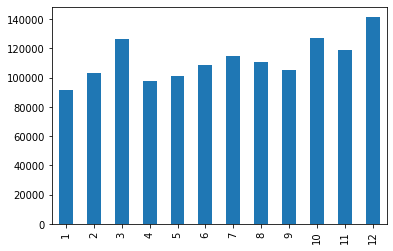

In [261]:
factory_out_joined['month'].value_counts().sort_index().plot(x='index', kind='bar')

In [262]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").groupby(['region_code', 'week']).count().sort_values(by='dt', ascending=False)['dt'].sort_values()

region_code  week
1.0          1         1
59.0         13        1
92.0         19        1
59.0         16        1
91.0         4         1
                    ... 
77.0         50      683
             9       712
             1       739
             52      786
             51      807
Name: dt, Length: 3108, dtype: int64

In [263]:
factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77").count()

dt                    24133
prid                  24133
inn                   24133
type_operation        24133
price                 24133
cnt                   24133
region_code           24133
city_with_type        24133
postal_code           24133
product_name          24133
product_short_name    24133
brand                 24133
country               24133
date                  24133
month                 24133
week                  24133
dtype: int64

In [267]:
data_1 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77")['week'].value_counts().sort_index()
data_2 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 55")['week'].value_counts().sort_index()
data_3 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 83")['week'].value_counts().sort_index()

<AxesSubplot:>

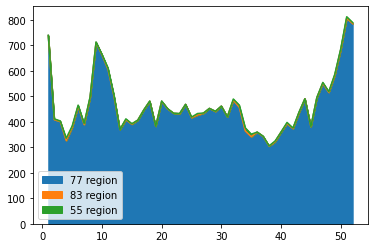

In [268]:
pd.DataFrame({'77 region':data_1, '83 region': data_3, '55 region': data_2}).plot(kind='area') # plt.stackplot()

Оборачиваемость по продукту на регион 

нужно добавить остатки

вуручка* остаток по месяцам * 12

In [ ]:
one_good_type_region['price'].sum()()

ARIMA|

In [272]:
factory_out_joined['product_short_name'].unique()

array(['2868B842B46F754C088D89E130F89585',
       '9199AB529CF62D4BDB7E8B1D7459001D',
       '9F7293E9B9C4AEC1FEC02CF457F72E93',
       'B8AF2335E04E7BAD5168D9B39FABAC21',
       'C6AD4B84092CCBB3E3729F73B00C55A1',
       '33D91F94B56C01E4E6E770AE00678E33',
       '75E0EAF2E5062A080CA0FDBBB8140627',
       '2169F5521C7AE342374A8298DBCA26FD'], dtype=object)

In [403]:
p1 = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77")['week'].value_counts().sort_index()
p2 = factory_out_joined.query("product_short_name == '2868B842B46F754C088D89E130F89585'").query("region_code == 77")['week'].value_counts().sort_index()
p3 = factory_out_joined.query("product_short_name == 'C6AD4B84092CCBB3E3729F73B00C55A1'").query("region_code == 77")['week'].value_counts().sort_index()
p4 = factory_out_joined.query("product_short_name == '75E0EAF2E5062A080CA0FDBBB8140627'").query("region_code == 77")['week'].value_counts().sort_index()
p5 = factory_out_joined.query("product_short_name == '2169F5521C7AE342374A8298DBCA26FD'").query("region_code == 77")['week'].value_counts().sort_index()

p1_ = factory_out_joined.query("product_short_name == '9199AB529CF62D4BDB7E8B1D7459001D'").query("region_code == 77")['date'].value_counts().sort_index()
p2_ = factory_out_joined.query("product_short_name == '2868B842B46F754C088D89E130F89585'").query("region_code == 77")['date'].value_counts().sort_index()
p3_ = factory_out_joined.query("product_short_name == 'C6AD4B84092CCBB3E3729F73B00C55A1'").query("region_code == 77")['date'].value_counts().sort_index()
p4_ = factory_out_joined.query("product_short_name == '75E0EAF2E5062A080CA0FDBBB8140627'").query("region_code == 77")['date'].value_counts().sort_index()
p5_ = factory_out_joined.query("product_short_name == '2169F5521C7AE342374A8298DBCA26FD'").query("region_code == 77")['date'].value_counts().sort_index()

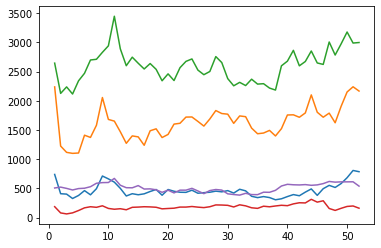

In [287]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.plot(p4)
plt.plot(p5)
plt.show()

In [377]:
p1_.index

DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01',
               ...
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21'],
              dtype='datetime64[ns]', length=365, freq=None)

In [388]:
pd.date_range(start = '2021-11-22', end = '2022-11-21' ).difference(p4_.index)

DatetimeIndex(['2022-01-01'], dtype='datetime64[ns]', freq=None)

In [410]:
p4_ = p4_.reindex(pd.date_range('2021-11-22', '2022-11-21'))

In [415]:
p4_['2022-01-01'] = 24.0

In [416]:
df_for_etna = pd.concat([pd.DataFrame({'timestamp': p1_.index, 'target': p1_.values, 'segment':'1'}), pd.DataFrame({'timestamp': p2_.index, 'target': p2_.values, 'segment':'2'}),
          pd.DataFrame({'timestamp': p3_.index, 'target': p3_.values, 'segment':'3'}), pd.DataFrame({'timestamp': p4_.index, 'target': p4_.values, 'segment':'4'}),
           pd.DataFrame({'timestamp': p5_.index, 'target': p5_.values, 'segment':'5'})]
         )
df_for_etna.to_csv('df_for_etna.csv', index=False)

In [360]:
factory_move.query("receiver_inn =='DA62EC79660CF21AC37A260DA6F642C4'")

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
34037,2022-06-14,6A4EE9D4447328F9978C552BAE90FDC4,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,1
34128,2022-06-14,B482F2136F3C04724E6D5EC4050B38DD,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,2
45435,2022-06-14,9BD7C9BD8284D0E66885D44664D95E56,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,1
60397,2022-08-08,5D74B67E1DAC42C7526F27A6BDA73FF6,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,2
74958,2022-08-08,289AEBCA82877CB19E7AA33E0E522883,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,2
75022,2022-08-08,C573AB658E14D20548F7BF0C4D6558C7,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,1
86756,2022-08-08,06F4CAE6A2764D141E53C3AC8282CD36,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,1
89915,2021-12-14,900285DDA427273B6763695C00E6205E,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,24
99172,2021-12-14,885F450AE785CE4BABDF43EE3DD63BF4,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,42
99173,2021-12-14,B0DE558FA9F1E416DB9F243A46D157B7,DA62EC79660CF21AC37A260DA6F642C4,2BE02F3FE88C85D34B7B4A577DAA638D,DA62EC79660CF21AC37A260DA6F642C4,36
